In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import tensorflow as tf
import string
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [5]:
import matplotlib.pyplot as plt

In [6]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
#READ DATASET
dataframe = pd.read_csv("/content/drive/My Drive/train.csv")
dataframe.head()

,Title,Author,Category,Pengalaman Pribadi,Kesehatan Mental,Profesi,Percintaan,Mistis
0,Reflections as a Senior: My Favorite Moments,Mayoma Jolayemi '23,Pengalaman Pribadi,1,0,0,0,0
1,The Transformative Power of a Bachelor’s Degree,Clive Walker,Pengalaman Pribadi,1,0,0,0,0
2,Managing stress in College Academics,Vivek Rajak,"Pengalaman Pribadi, Kesehatan Mental",1,1,0,0,0
3,My college experience,Laurent Etienne,Pengalaman Pribadi,1,0,0,0,0
4,Choosing a Major: Finding Your Passion and Car...,Caroline Archer,Pengalaman Pribadi,1,0,0,0,0


In [9]:
dataframe = pd.read_csv("/content/drive/My Drive/train.csv")
dataframe.drop(['Author', 'Category'], axis=1, inplace=True)
dataframe.head()

,Title,Pengalaman Pribadi,Kesehatan Mental,Profesi,Percintaan,Mistis
0,Reflections as a Senior: My Favorite Moments,1,0,0,0,0
1,The Transformative Power of a Bachelor’s Degree,1,0,0,0,0
2,Managing stress in College Academics,1,1,0,0,0
3,My college experience,1,0,0,0,0
4,Choosing a Major: Finding Your Passion and Car...,1,0,0,0,0


In [10]:
dataframe.shape

(100, 6)

In [11]:
dataframe.Title = dataframe.Title.astype('string')
dataframe.dtypes

Title                 string
Pengalaman Pribadi     int64
Kesehatan Mental       int64
Profesi                int64
Percintaan             int64
Mistis                 int64
dtype: object

In [12]:
dataframe.isnull().sum()

Title                 0
Pengalaman Pribadi    0
Kesehatan Mental      0
Profesi               0
Percintaan            0
Mistis                0
dtype: int64

In [13]:
Article = dataframe.Title.values
y_fields = ['Pengalaman Pribadi',	'Kesehatan Mental',	'Profesi'	,'Percintaan',	'Mistis']
y = dataframe[y_fields].values

In [16]:
test_x = pd.read_csv('/content/drive/My Drive/test.csv')
test_y = pd.read_csv('/content/drive/My Drive/test_labels.csv')

In [17]:
x_test = test_x['Title'].values
y_test = test_y[y_fields].values

In [18]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(Article)

# Tokenization of x_test
tokenizer.fit_on_texts(x_test)

In [19]:
sent_length = 100
voc_size = 10000
input_dim = 10

In [20]:
seq = tokenizer.texts_to_sequences(Article)
pad = sequence.pad_sequences(seq, maxlen=100)

test_seq = tokenizer.texts_to_sequences(x_test)
test_pad = sequence.pad_sequences(test_seq, maxlen=100)
     

In [21]:
model = Sequential()
model.add(Embedding(voc_size, input_dim, input_length=sent_length))
model.add(LSTM(128))
model.add(Dense(5, activation='sigmoid'))
#model.add(Dropout(.3))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 10)           100000    
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 171,813
Trainable params: 171,813
Non-trainable params: 0
_________________________________________________________________


In [22]:
len(pad), y.shape , len(test_pad), y_test.shape

(100, (100, 5), 100, (100, 5))

In [23]:
x_train = np.array(pad)
y_train = np.array(y)

x_test = np.array(test_pad)
y_test = np.array(y_test)

In [24]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((100, 100), (100, 5), (100, 100), (100, 5))

In [26]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 0s 281ms/step - loss: 1.6265 - accuracy: 0.4600 - val_loss: 1.6237 - val_accuracy: 0.4600
Epoch 2/50
2/2 [==============================] - 0s 250ms/step - loss: 1.6246 - accuracy: 0.4600 - val_loss: 1.6233 - val_accuracy: 0.4600
Epoch 3/50
2/2 [==============================] - 1s 416ms/step - loss: 1.6239 - accuracy: 0.4600 - val_loss: 1.6269 - val_accuracy: 0.4600
Epoch 4/50
2/2 [==============================] - 1s 431ms/step - loss: 1.6295 - accuracy: 0.4600 - val_loss: 1.6306 - val_accuracy: 0.4600
Epoch 5/50
2/2 [==============================] - 1s 594ms/step - loss: 1.6313 - accuracy: 0.4600 - val_loss: 1.6286 - val_accuracy: 0.4600
Epoch 6/50
2/2 [==============================] - 1s 554ms/step - loss: 1.6286 - accuracy: 0.4600 - val_loss: 1.6255 - val_accuracy: 0.4600
Epoch 7/50
2/2 [==============================] - 1s 422ms/step - loss: 1.6262 - accuracy: 0.4600 - val_loss: 1.6233 - val_accuracy: 0.4600
Epoch 8/50
2/2 [====

In [27]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

4/4 - 0s - loss: 1.2329 - accuracy: 0.7300 - 266ms/epoch - 67ms/step


[1.232883334159851, 0.7300000190734863]

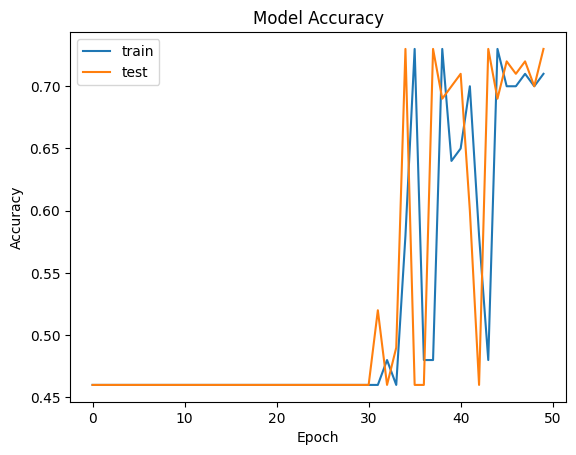

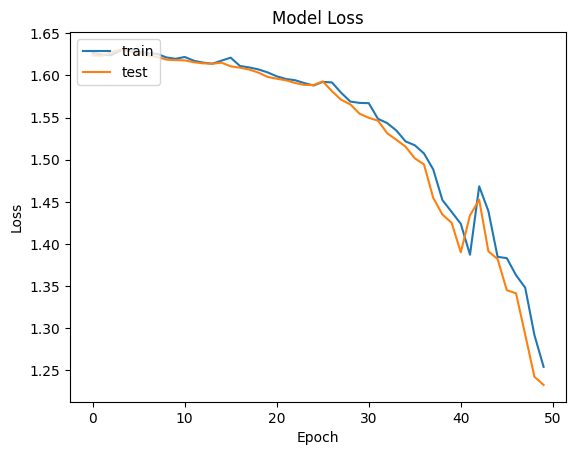

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model.save('TRIAL_1_STORYVERSE.h5')

In [30]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(voc_size, input_dim, input_length=sent_length ))
model.add(Dropout(.3))
model.add(LSTM(100))
model.add(Dropout(.3))
model.add(Dense(6, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
from keras.models import load_model

# To load the model
load_model('TRIAL_1_STORYVERSE.h5')

In [32]:
category=dataframe["Title"] != ""
dataframe=dataframe[category]
dataframe=dataframe.dropna()

In [41]:
print(dataframe["Title"][52])

Pengalaman Saya Selama Menjadi UX Designer Intern di Blibli.com


In [42]:
print("Pengalaman Pribadi:" + str(dataframe["Pengalaman Pribadi"][52]))
print("Kesehatan Mental:" + str(dataframe["Kesehatan Mental"][52]))
print("Profesi:" + str(dataframe["Profesi"][52]))
print("Percintaan:" + str(dataframe["Percintaan"][52]))
print("Mistis:" + str(dataframe["Mistis"][52]))

Pengalaman Pribadi:1
Kesehatan Mental:0
Profesi:1
Percintaan:0
Mistis:0


# satu kategori

In [71]:
# Membuat fungsi untuk merekomendasikan judul berdasarkan kategori-kategori menggunakan model pelatihan
def recommend_titles(categories):
    # Mengambil judul-judul dengan kategori-kategori yang diberikan
    category_titles = dataframe[dataframe[categories].all(axis=1)]['Title']
    
    # Mengubah judul-judul menjadi input yang sesuai dengan tokenizer
    title_sequences = tokenizer.texts_to_sequences(category_titles)
    title_sequences = sequence.pad_sequences(title_sequences, maxlen=100)
    
    # Melakukan prediksi menggunakan model yang telah dilatih
    predictions = model.predict(title_sequences)
    
    # Menampilkan judul-judul yang memiliki semua kategori yang diberikan
    for i in range(len(category_titles)):
        title = category_titles.iloc[i]
        print(title)

# Contoh penggunaan: merekomendasikan judul-judul berdasarkan kategori
recommend_titles(["Mistis"])

1/1 [==============================] - 0s 41ms/step
Cerita Mini : Suara yang Menumbangkan Malam
4 Pengalaman Mistis (atau mungkin Parno Saja) yang Saya Alami Sepanjang Hidup


# Lebih dari 2 Category

In [72]:
# Membuat fungsi untuk merekomendasikan judul berdasarkan kategori-kategori menggunakan model pelatihan
def recommend_titles(categories):
    # Mengambil judul-judul dengan kategori-kategori yang diberikan
    category_titles = dataframe[dataframe[categories].all(axis=1)]['Title']
    
    # Mengubah judul-judul menjadi input yang sesuai dengan tokenizer
    title_sequences = tokenizer.texts_to_sequences(category_titles)
    title_sequences = sequence.pad_sequences(title_sequences, maxlen=100)
    
    # Melakukan prediksi menggunakan model yang telah dilatih
    predictions = model.predict(title_sequences)
    
    # Menampilkan judul-judul yang memiliki semua kategori yang diberikan
    for i in range(len(category_titles)):
        title = category_titles.iloc[i]
        print(title)

# Contoh penggunaan: merekomendasikan judul-judul berdasarkan kategori
recommend_titles(["Pengalaman Pribadi", "Profesi"])

1/1 [==============================] - 0s 32ms/step
Menjadi Programmer dalam 6 Bulan (Pengalaman Pribadi)
Menjadi Programmer dalam 6 Bulan (Pengalaman Pribadi)
Menjalankan Bisnis Ala Introvert
Goodbye, Data Analyst
Pengalaman Kerja: 3 Tahun Sebagai Programmer
Pengalaman Jadi Content Writer, Seru Gak Sih?
Pengalaman Saya Selama Menjadi UX Designer Intern di Blibli.com
Pengalaman Kerja Sebagai Programmer di Salah Satu Klien Glints Batam
Pengalaman pindah haluan karir menjadi UX Designer atau Product Designer
Mengatur Ritme Pekerjaan
